<a href="https://colab.research.google.com/github/myGithubAccount26/Biostatistics/blob/master/Biostatistics_Lab_3_Functional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

<img src = 'https://miro.medium.com/max/2670/1*plcDnA6sjme0RWvxbvaWgg.png'>

<img src='https://user-images.githubusercontent.com/35667308/48126015-2354ab00-e2a6-11e8-9a22-c58ad6ee7733.png'>

In [ ]:
# Get Data file here
# https://drive.google.com/file/d/1Qunag0Gsslz80Jgiyi_tv8d1d8wxRr4l/view?usp=sharing

In [1]:
## Import mpcr package for functions we may use in the lab
!pip install git+https://github.com/williamedwardhahn/mpcr
from mpcr import *

  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-xea_l92f
  Running command git clone -q https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-xea_l92f
  Created wheel for ImportMPCR: filename=ImportMPCR-0.0.1-cp36-none-any.whl size=7323 sha256=8ff11429bb4731d2345f3781ef3330a9d24812251c060f2d0830170b0cb509c6
  Stored in directory: /tmp/pip-ephem-wheel-cache-jubc4o0r/wheels/89/93/47/ef43fe80a5b823a05d8dcca5ed1581f4fcdacf69b27110603f
Successfully built ImportMPCR
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
## Mount your drive folder
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## Read in iris dataset stored in Data1 folder 
dataset = pd.read_csv('/content/drive/My Drive/Data1/Iris.csv')

In [4]:
## Show preview of the iris dataset
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


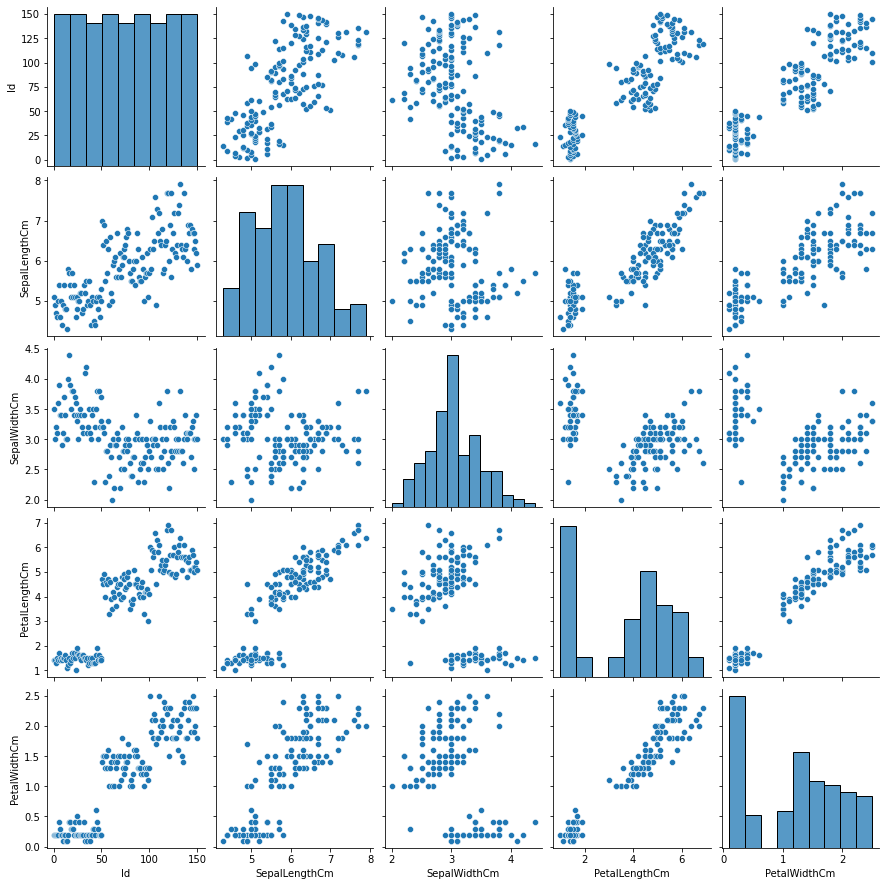

In [5]:
## Create grid of plots showing bivariate scatter plots as well as univariate discrete distributions along the diagonal
g = sns.pairplot(dataset)

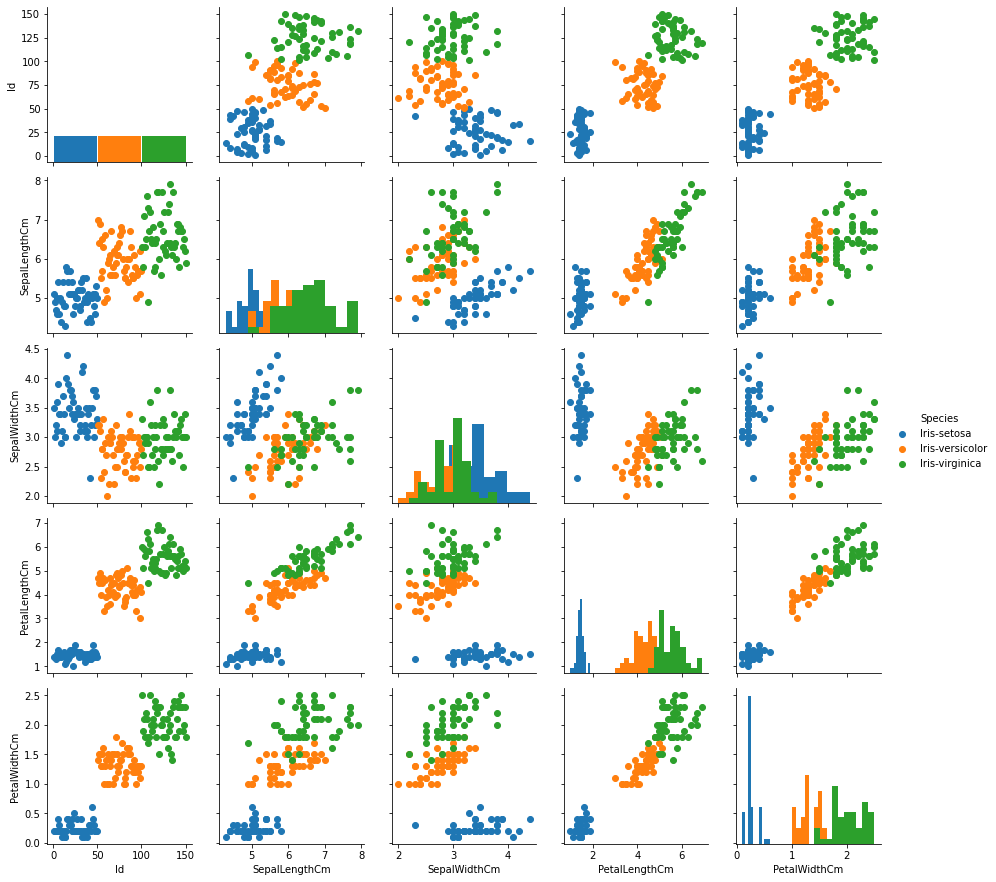

In [6]:
## The following code will create a similar plot however here we add in the "hue" specification in order to represent different species with variant colors
g = sns.PairGrid(dataset, hue="Species")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

## We can see that the setosa species seems to be very different than both versicolor and virginica

In [7]:
## This chunk sets aside a vector of the species within our dataset and sets aside the data into our input_data
target_data = dataset[['Species']]
input_data = dataset.drop(['Id','Species'],axis=1)

In [8]:
## Here we create an array with our input dataset for easy manipulations
input_data = np.array(input_data)

In [9]:
input_data[0:10,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

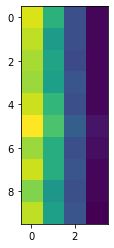

In [10]:
## The following plot will show variation within our dataset where the colors of each cell are represented by the magnitude for that index 
plt.imshow(input_data[0:10,:])

In [11]:
## This line of code will take our input vector with nominal species categories and perform one-hot encoding in order to convert that vector into a binary array which represents each level evenly
target_data = pd.get_dummies(target_data.Species)

In [12]:
target_data 

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [13]:
## This marks the index where each species is identified
_, target_data = np.where(target_data==1)

In [14]:
target_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
## Randomly sort the indexes from 0 through the length of our input data set
r = np.random.permutation(input_data.shape[0])

In [16]:
r

array([ 28,  29,  94, 103, 119, 143,  19, 114, 105,   8, 144,   3, 102,
        70, 131,  44,  42, 134, 146,  78, 123,  55,  64,  81, 138,  39,
        60,  89, 126,   4,  56,  62,  79,   2, 141,  97, 109,  51,  30,
        72,  66,  75,  69,  17, 112, 149,  95,  57, 110, 135,  82,  47,
       111,  25,  71,  84, 148,   9,   5, 101,  12,  80,   6, 125,  34,
       100,  36,  76, 115,  40,  58, 136,  68,  92,  22, 116, 137,  35,
       145, 117, 140, 139,  23,  53, 107, 132,  63, 129,  48,  74,  27,
        32,  99, 130,  52,  21,  87,  33,  85,  20, 106, 133,  61, 147,
        73,  50, 127,  77,  86,  90, 128,  16,  93, 120,  88,   7,  49,
        91,  31,  24,  37,  10, 124,  13,  15,  26,   1,  46,  65, 104,
       108,  54, 122,  96,  41, 121,  59, 118,  14,  43,  67,  83,  45,
        18,  38, 113,   0,  11,  98, 142])

In [17]:
## Set a cut aside for 80% of the length of our dataset, this cut will be used to split our test and training sets
cut = int(0.8*len(r))

In [18]:
input_data.shape

(150, 4)

In [19]:
## Here we are creating our test (Y) and training datasets (X) using the random indexes in r and selecting up to our cut value 
X = input_data[r[:cut],:]
X_test = input_data[r[cut:],:]
Y = target_data[r[:cut]]
Y_test = target_data[r[cut:]]

In [20]:
## Defining the function we use 
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [21]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [22]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [23]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [25]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [26]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [27]:
def gradient_step(w):

    for j in range(len(w)): 

            w[j].data = w[j].data - c.h*w[j].grad.data
            
            w[j].grad.data.zero_()

In [28]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})

In [29]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [30]:
def relu(x):
    return x * (x > 0)

In [31]:
def model(x,w):

    for j in range(len(w)):

        x = relu(matmul(x,w[j]))

    return x

In [32]:
## Here we will run through iterations of the model, training it to better work on our dataset

wb.init(project="Iris");
c = wb.config

c.h = 0.05
c.b = 20
c.layers = 3 
c.epochs = 2500

c.f_n = [4,16,16,3]

w = [ GPU(randn_trunc((c.f_n[i],c.f_n[i+1]))) for i in range(c.layers) ]

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    loss.backward()

    gradient_step(w)
   
    if (i+1) % 1 == 0:

        make_plots()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [48]:
h = 0.05
b = 20
layers = 3 
epochs = 2500

f_n = [4,16,16,3]

w2 = [ GPU(randn_trunc((f_n[i],f_n[i+1]))) for i in range(c.layers) ]
for i in range(c.layers):
  print(f_n[i], f_n[i+1])

4 16
16 16
16 3


In [54]:
randn_trunc((4, 16))

array([[ 0.0413396 ,  0.08345063,  0.0562128 , -0.11952605,  0.02649347,
         0.12721843,  0.06593706,  0.04637793, -0.0137034 , -0.0554816 ,
        -0.00881774, -0.01182179, -0.0661178 ,  0.03315446,  0.13480525,
         0.05821107],
       [-0.01493436, -0.0596862 , -0.03667539,  0.00288004, -0.04051877,
         0.06603552, -0.01654193,  0.11745774,  0.13299679, -0.08055431,
         0.02423039,  0.17625631, -0.12916529, -0.0326339 ,  0.06651442,
         0.06111806],
       [-0.05923374, -0.01933123,  0.07525829, -0.12249014, -0.00172152,
        -0.09043306,  0.00903722, -0.05428917,  0.10373546, -0.05251714,
         0.058782  ,  0.04844368,  0.06110618,  0.13734862,  0.10835979,
        -0.01209984],
       [ 0.04781404,  0.0158966 , -0.19172883,  0.05679153, -0.11267231,
         0.14672262,  0.13700513, -0.02067054,  0.12230187, -0.11177691,
         0.02740298,  0.06223497, -0.08514415, -0.05189771,  0.09070029,
         0.00457634]])

In [45]:
range(3)

range(0, 3)

[tensor([[-0.0368,  0.0442, -0.0482,  0.0346, -0.0316, -0.0032,  0.0536,  0.0478,
          -0.0036,  0.0013,  0.0276, -0.0356,  0.0484, -0.0794,  0.0211, -0.0221],
         [-0.0753, -0.1189, -0.0475,  0.1620,  0.0593,  0.1093,  0.0666,  0.0294,
          -0.0307, -0.0294,  0.1088,  0.0151, -0.1746, -0.1154, -0.0694, -0.0456],
         [-0.1486,  0.0335,  0.0167,  0.0491, -0.0018, -0.0816, -0.0358,  0.0992,
           0.1317, -0.0754,  0.0268, -0.1327, -0.0817,  0.0111, -0.0975, -0.1984],
         [-0.0678,  0.0788,  0.1131,  0.1110, -0.0683, -0.0160,  0.0355,  0.0978,
           0.0041,  0.1106,  0.0694,  0.0761, -0.1101, -0.1375, -0.0603,  0.0516]],
        device='cuda:0', requires_grad=True),
 tensor([[ 5.8289e-02,  1.3538e-01, -1.1421e-01,  1.2808e-01, -1.8697e-02,
          -3.2495e-02,  9.3600e-02, -7.5643e-02,  1.9359e-02,  7.4921e-02,
          -8.7492e-02,  1.3211e-02,  1.3765e-03, -5.7586e-02, -1.8641e-01,
          -5.4231e-03],
         [ 5.2262e-02, -9.7206e-02,  3.7164e

In [33]:
acc(model(X,w),Y)

0.95

In [36]:
acc(model(X_test,w),Y_test)

0.9666666666666667

In [37]:
X[0]

tensor([5.2000, 3.4000, 1.4000, 0.2000], device='cuda:0')

In [38]:
model(X[0],w)

tensor([24.9341, 17.1578, -0.0000], device='cuda:0', grad_fn=<MulBackward0>)

In [39]:
torch.argmax(model(X[0],w))

tensor(0, device='cuda:0')

In [40]:
Y[0]

tensor(0., device='cuda:0')

In [41]:
w

[tensor([[ 0.0399,  0.4910, -0.0515, -0.1914, -0.1953, -0.2309, -0.0018, -0.1408,
           0.6160,  0.5772, -0.1995,  0.3516, -0.0292,  0.0174, -0.0771,  1.0312],
         [ 0.1223,  0.2830, -0.1689, -0.5248,  0.0941, -0.3032, -0.1391,  0.0092,
           0.5374,  0.3286, -0.0778,  0.3994, -0.1620, -0.0347,  0.0132,  1.0009],
         [ 0.2601, -0.5416, -0.0477,  1.0456,  0.0815,  1.0518,  0.1065,  0.1619,
          -0.5683,  0.0232,  0.0031, -0.1849, -0.0765, -0.0177, -0.0261, -0.9992],
         [ 0.0742, -0.3901,  0.1186,  0.8597, -0.0148,  0.7612, -0.1607, -0.0856,
          -0.5109, -0.2963, -0.0511, -0.0641,  0.1734,  0.0312,  0.0155, -1.3904]],
        device='cuda:0', requires_grad=True),
 tensor([[ 1.8458e-02, -6.4797e-02, -4.0904e-02,  1.7605e-01,  1.4207e-01,
           2.2128e-01,  2.1526e-01, -9.0835e-02,  8.3550e-02, -2.0225e-03,
          -1.7231e-02,  1.8080e-01, -1.5503e-01,  1.1124e-01,  1.2012e-01,
          -6.0887e-02],
         [-2.0987e-02, -5.3614e-02, -6.5281e

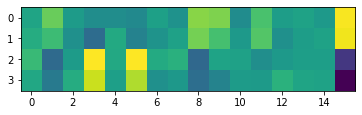

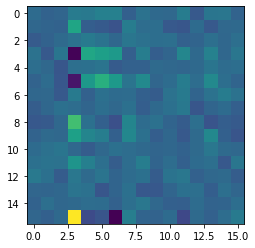

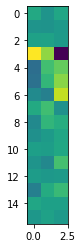

In [42]:
for i in range(len(w)):

    plt.imshow(w[i].cpu().detach().numpy())
    plt.show()

In [ ]:
def softplus(x):
    return torch.log(1+torch.exp(x))

In [ ]:
def model(x,w):

    for j in range(len(w)):

        x = softplus(matmul(x,w[j]))

    return x